In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import StockHistory
import seaborn as sns

In [29]:
names = StockHistory.get_namad_list()

In [33]:
sec_data = pd.DataFrame()
for n in names.head(n=50)["NAMAD"]:
    sec_data[n] = StockHistory.get_namad_history_by_name(n,start_date='1390-1-1',from_cache=True)["ClosePrice"]
len(sec_data)

48

In [34]:
sec_returns = np.log(sec_data / sec_data.shift(1))
sec_returns.head()

,جكانه806,تملي612,فسا,تسه9705,فرآور,ضمخا7012,سبزوا,وبملت,لپيام,ثنام,...,سكرد98,حتايد,غشهدابح,رتكو,تملي706,ثمسكن,صايپا908,ضخود1024,مفاخر,قرن99
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.048583,0.0,-0.062945,0.014969,0.007075,0.0,0.013161,-0.042505,0.000000,0.002891,...,0.0,-0.006590,-0.007667,-0.028353,0.000000,0.016423,0.0,0.0,-0.046858,0.0
2,-0.013306,0.0,0.001273,0.024704,-0.015181,0.0,-0.032069,0.008453,-0.062198,-0.023366,...,0.0,-0.000472,-0.005343,-0.030161,0.000000,-0.033120,0.0,NaN,-0.032918,0.0
3,-0.012862,0.0,-0.005102,-0.010236,-0.000902,NaN,0.039257,-0.013690,0.013453,-0.002959,...,0.0,-0.007112,-0.023488,0.005325,-0.048753,-0.041860,0.0,NaN,-0.005219,0.0
4,0.000596,0.0,0.021506,0.018225,0.008140,NaN,0.047638,0.014661,0.000000,0.015294,...,0.0,0.016752,0.019910,0.030529,0.000000,-0.000764,0.0,NaN,0.031398,0.0


In [35]:
corr = sec_returns.corr()

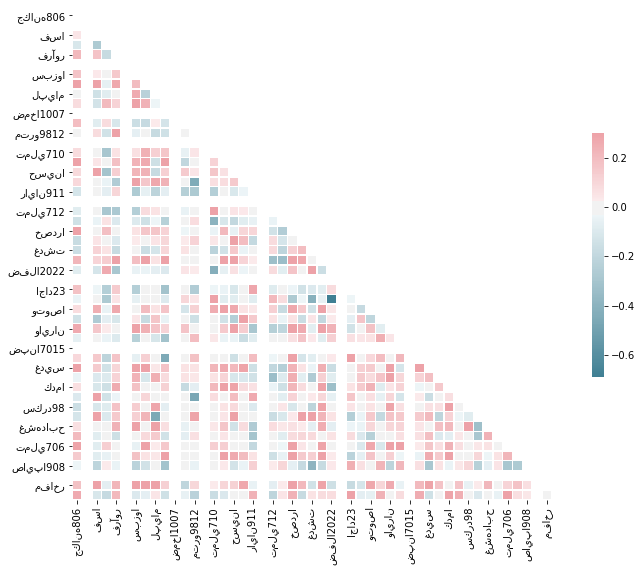

In [36]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})